In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [11]:
# Load and clean data
# Load and clean data
df = pd.read_csv(r"Untitled Folder/Cleaned_data.csv")
df = df[df['Entity'] != 'Grand Total']
numeric_columns = ['Negative', 'Neutral', 'Positive', 'Irrelevant', 'Grand Total']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# Statistical functions
def calculate_central_tendency(df, column):
    return df[column].mean(), df[column].median(), df[column].mode()[0] if not df[column].mode().empty else np.nan

def calculate_dispersion(df, column):
    return df[column].std(), df[column].var(), df[column].max() - df[column].min(), df[column].quantile(0.75) - df[column].quantile(0.25)

def calculate_shape(df, column):
    return stats.skew(df[column].dropna()), stats.kurtosis(df[column].dropna())

def calculate_confidence_interval(df, column, confidence=0.95):
    mean = df[column].mean()
    std_err = stats.sem(df[column].dropna())
    return stats.t.interval(confidence, len(df[column].dropna())-1, loc=mean, scale=std_err)

In [15]:
# Calculate stats
neg_mean, neg_median, neg_mode = calculate_central_tendency(df, 'Negative')
neg_std, neg_var, neg_range, neg_iqr = calculate_dispersion(df, 'Negative')
neg_skew, neg_kurt = calculate_shape(df, 'Negative')
neg_ci = calculate_confidence_interval(df, 'Negative')

correlation_matrix = df[['Negative', 'Neutral', 'Positive', 'Irrelevant']].corr()
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Negative'].dropna(), df['Positive'].dropna())
ttest_stat, ttest_pvalue = stats.ttest_ind(df['Negative'].dropna(), df['Positive'].dropna())


In [17]:
#Printing Values
print("Enhanced Statistical Analysis Results:")
print("\nNegative Sentiment Analysis:")
print(f"Mean: {neg_mean:.2f}")
print(f"Median: {neg_median:.2f}")
print(f"Mode: {neg_mode}")
print(f"Standard Deviation: {neg_std:.2f}")
print(f"Variance: {neg_var:.2f}")
print(f"Range: {neg_range}")
print(f"IQR: {neg_iqr:.2f}")
print(f"Skewness: {neg_skew:.2f}")
print(f"Kurtosis: {neg_kurt:.2f}")
print(f"95% Confidence Interval: ({neg_ci[0]:.2f}, {neg_ci[1]:.2f})")
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nRegression Analysis (Negative vs Positive):")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")
print("\nT-test (Negative vs Positive):")
print(f"T-statistic: {ttest_stat:.2f}")
print(f"P-value: {ttest_pvalue:.4f}")

Enhanced Statistical Analysis Results:

Negative Sentiment Analysis:
Mean: 117.41
Median: 102.50
Mode: 63
Standard Deviation: 54.90
Variance: 3013.80
Range: 234
IQR: 64.75
Skewness: 1.30
Kurtosis: 1.50
95% Confidence Interval: (97.61, 137.20)

Correlation Matrix:
            Negative   Neutral  Positive  Irrelevant
Negative    1.000000 -0.298550 -0.550861   -0.283371
Neutral    -0.298550  1.000000 -0.218666   -0.507305
Positive   -0.550861 -0.218666  1.000000   -0.121699
Irrelevant -0.283371 -0.507305 -0.121699    1.000000

Regression Analysis (Negative vs Positive):
Slope: -0.43
Intercept: 159.12
R-squared: 0.30
P-value: 0.0011

T-test (Negative vs Positive):
T-statistic: 0.72
P-value: 0.4726


In [41]:
# Calculate z-scores for Negative sentiment
df['Negative_z'] = stats.zscore(df['Negative'].fillna(0))

# Outliers (absolute z > 2)
outliers = df[np.abs(df['Negative_z']) > 2]
print("\nEntities with Unusually High or Low Negative Sentiment:")
print(outliers[['Entity', 'Negative', 'Negative_z']])


Entities with Unusually High or Low Negative Sentiment:
       Entity  Negative  Negative_z
19  MaddenNFL       285    3.101665
21      NBA2K       246    2.379891


In [43]:
#Sentiment Balance Score
df['Sentiment_Balance'] = (df['Positive'] - df['Negative']) / df['Grand Total']
print("\nEntities with Highest Positive Sentiment Balance:")
print(df[['Entity', 'Sentiment_Balance']].sort_values(by='Sentiment_Balance', ascending=False).head(5))


Entities with Highest Positive Sentiment Balance:
                    Entity  Sentiment_Balance
2           AssassinsCreed           0.475936
26  RedDeadRedemption(RDR)           0.275862
4              Borderlands           0.259843
8            Cyberpunk2077           0.250000
25       PlayStation5(PS5)           0.210390


In [19]:
# Set style
plt.style.use('seaborn-v0_8')

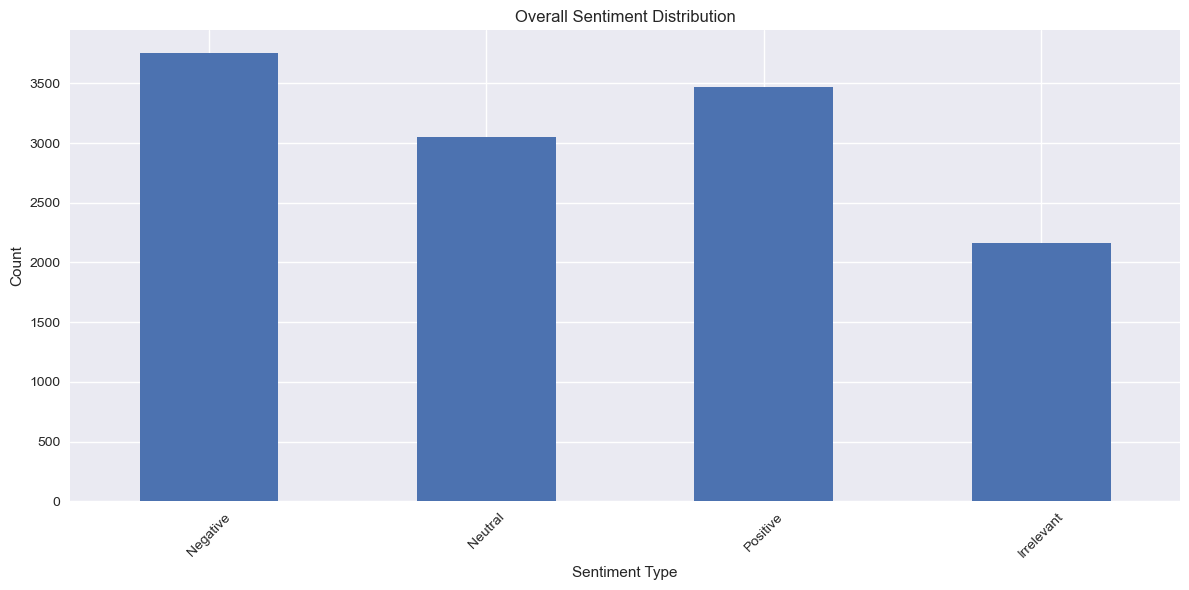

In [21]:
# Bar plot of sentiment sums
plt.figure(figsize=(12, 6))
sentiment_sums = df[['Negative', 'Neutral', 'Positive', 'Irrelevant']].sum()
sentiment_sums.plot(kind='bar')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

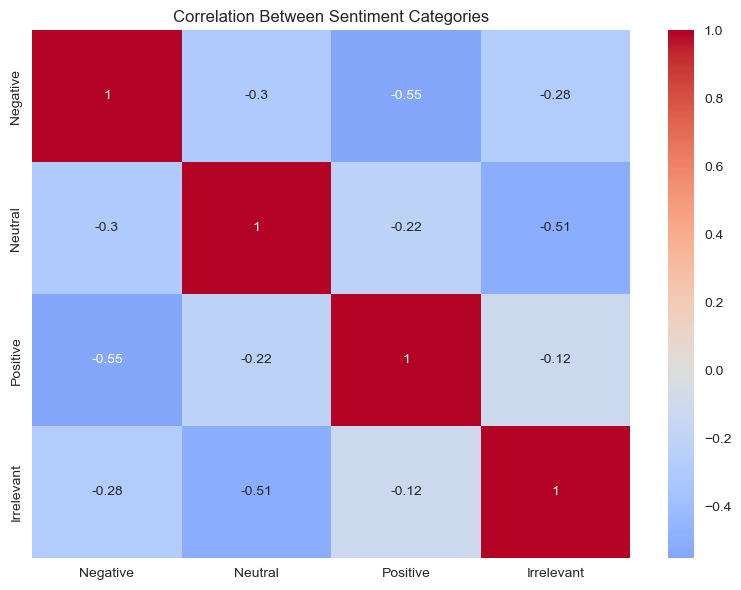

In [27]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Sentiment Categories')
plt.tight_layout()

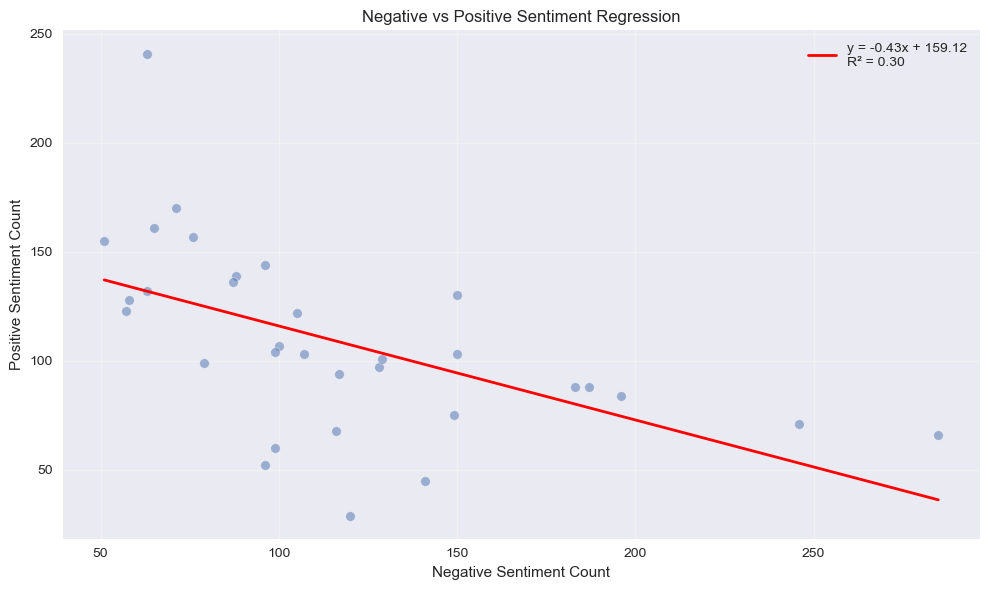

In [29]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Negative', y='Positive', data=df, alpha=0.5)
x_range = np.array([df['Negative'].min(), df['Negative'].max()])
plt.plot(x_range, intercept + slope * x_range, color='red', lw=2,
         label=f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}')
plt.title('Negative vs Positive Sentiment Regression')
plt.xlabel('Negative Sentiment Count')
plt.ylabel('Positive Sentiment Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

<Figure size 1000x800 with 0 Axes>

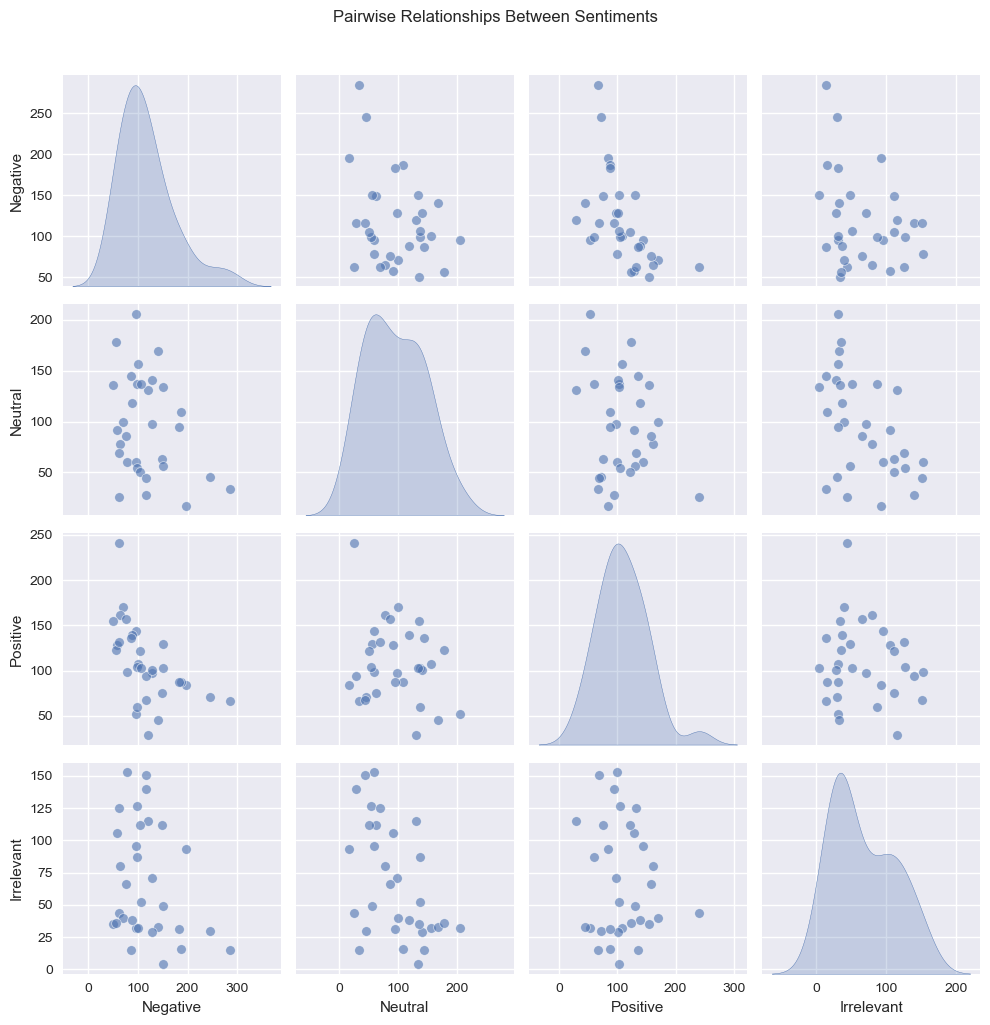

In [31]:
# Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Negative', 'Neutral', 'Positive', 'Irrelevant']], 
             diag_kind='kde', 
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Between Sentiments', y=1.02)
plt.tight_layout()

C:\Users\CL402_29\AppData\Local\Temp\ipykernel_13700\617786896.py:48: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\CL402_29\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


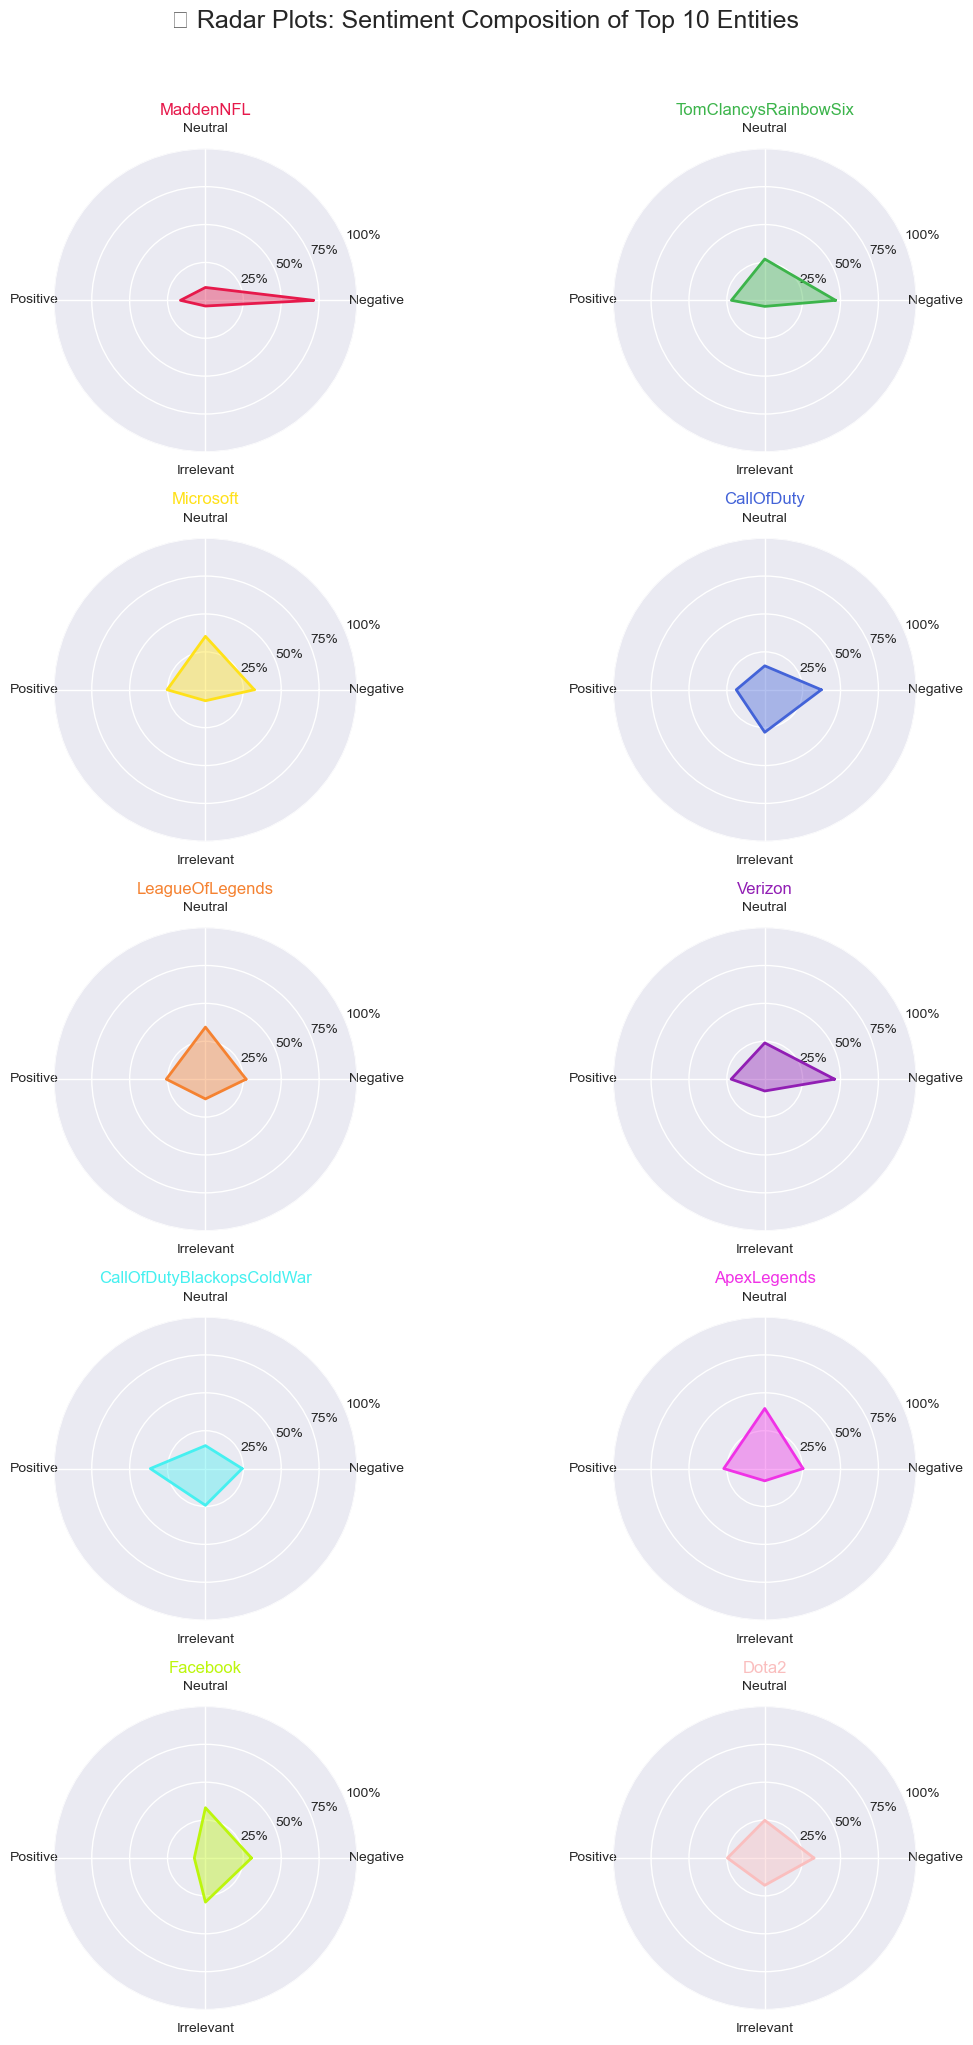

In [57]:
# Top 10 entities bar plot
import matplotlib.pyplot as plt
import numpy as np
from math import pi

def colorful_radar_plot_top_10_custom(df):
    # Calculate sentiment proportions
    for col in ['Negative', 'Neutral', 'Positive', 'Irrelevant']:
        df[f'{col}_pct'] = df[col] / df['Grand Total']

    # Get top 10 entities
    top_10 = df.sort_values(by='Grand Total', ascending=False).head(10)

    # Radar chart setup
    categories = ['Negative_pct', 'Neutral_pct', 'Positive_pct', 'Irrelevant_pct']
    labels = ['Negative', 'Neutral', 'Positive', 'Irrelevant']
    N = len(labels)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # close the loop

    # Custom color palette (10 distinct and bright colors)
    custom_colors = [
        "#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231",
        "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe"
    ]

    # Create subplots
    fig, axes = plt.subplots(5, 2, figsize=(12, 20), subplot_kw={'polar': True})
    axes = axes.flatten()

    for i, (idx, row) in enumerate(top_10.iterrows()):
        values = row[categories].values.flatten().tolist()
        values += values[:1]  # close the loop

        ax = axes[i]
        color = custom_colors[i % len(custom_colors)]

        ax.plot(angles, values, linewidth=2, color=color)
        ax.fill(angles, values, alpha=0.4, color=color)
        ax.set_title(row['Entity'], size=12, color=color)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        ax.set_yticks([0.25, 0.5, 0.75, 1.0])
        ax.set_yticklabels(['25%', '50%', '75%', '100%'])
        ax.grid(True)

    plt.suptitle('Radar Plots: Sentiment Composition of Top 10 Entities', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()


colorful_radar_plot_top_10_custom(df)

<Figure size 1200x600 with 0 Axes>

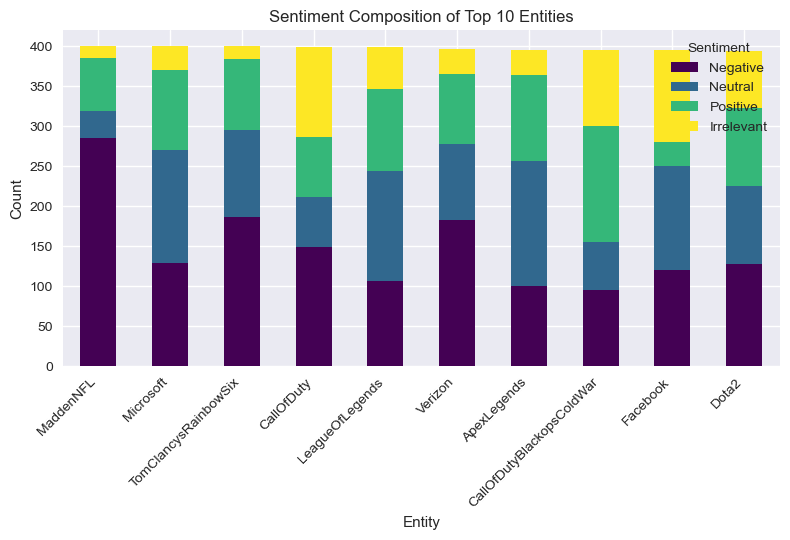

In [35]:
# Stacked bar plot of top 10
plt.figure(figsize=(12, 6))
top_10.set_index('Entity')[['Negative', 'Neutral', 'Positive', 'Irrelevant']].plot(
    kind='bar', 
    stacked=True,
    colormap='viridis'
)
plt.title('Sentiment Composition of Top 10 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()

plt.show()